In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
### Create docs directory
if not(os.path.exists("../docs/")):
    os.mkdir("../docs")

In [3]:
### Load data
df = pd.read_csv("../files/input/shipping-data.csv")
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
9563,9564,F,Road,4,5,191,2,low,M,10,5068,1
8047,8048,F,Ship,6,5,301,5,low,M,8,1443,0
7542,7543,D,Flight,6,3,226,3,high,F,4,4604,1
968,969,A,Flight,2,5,272,2,low,M,24,3638,1
8599,8600,F,Ship,4,1,232,5,medium,M,8,1943,0


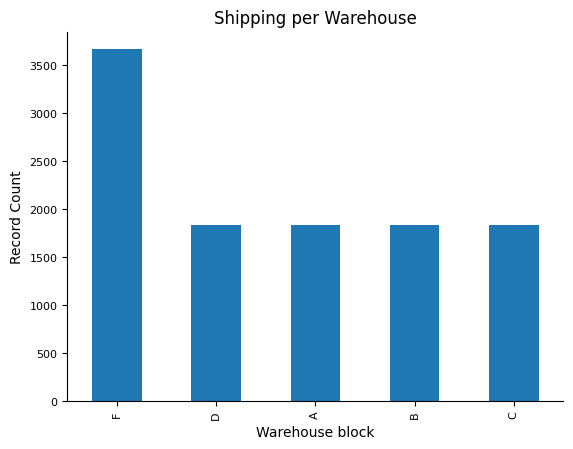

In [4]:
# New Figure 
plt.Figure()

counts_warehouse_blocks = df.copy()["Warehouse_block"].value_counts()
counts_warehouse_blocks.plot.bar(
    title="Shipping per Warehouse",
    xlabel="Warehouse block",
    ylabel="Record Count",
    color="tab:blue",
    fontsize=8
)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Save graph
plt.savefig("../docs/shipping_per_warehouse.png")
plt.show()

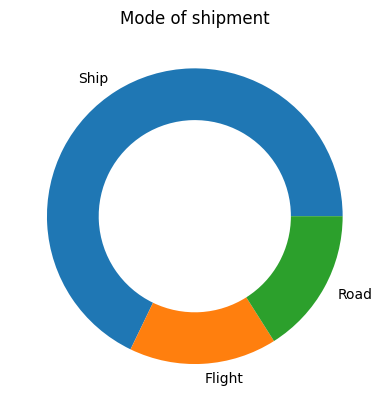

In [5]:
# New Figure 
plt.Figure()

counts_mode_shipment = df.copy()["Mode_of_Shipment"].value_counts()
counts_mode_shipment.plot.pie(
    title="Mode of shipment",
    wedgeprops=dict(width=0.35),
    ylabel="",
    colors=["tab:blue", "tab:orange", "tab:green"]
)
# Save graph
plt.savefig("../docs/mode_of_shipment.png")
plt.show()

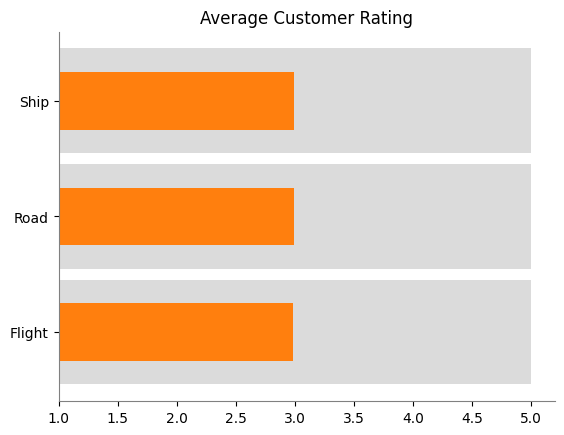

In [6]:
# New Figure 
plt.Figure()

df_resume = (
    df.copy()[["Mode_of_Shipment", "Customer_rating"]]
    .groupby("Mode_of_Shipment")
    .describe()
)
df_resume.columns = df_resume.columns.droplevel()
df_resume = df_resume[["mean", "min", "max"]]

plt.barh(
    y=df_resume.index.values,
    width=df_resume["max"].values - 1,
    left=df_resume["min"].values,
    height=0.9,
    color="lightgray",
    alpha=0.8
)

colors = [
    "tab:green" if value >= 3.0 else "tab:orange" for value in df_resume["mean"].values
]

plt.barh(
    y=df_resume.index.values,
    width=df_resume["mean"].values - 1,
    left=df_resume["min"].values,
    height=0.5,
    color=colors,
    alpha=1
)

plt.title("Average Customer Rating")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Save graph
plt.savefig("../docs/average_customer_rating.png")

plt.show()

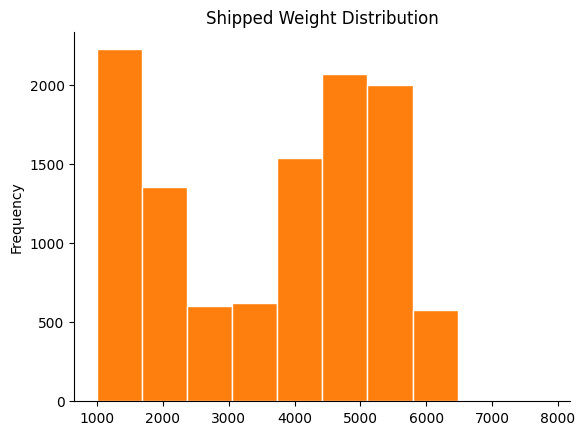

In [7]:
plt.Figure()

df["Weight_in_gms"].plot.hist(
    title="Shipped Weight Distribution",
    color="tab:orange",
    edgecolor="white"
)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.savefig("../docs/weight_distribution.png")
plt.show()

In [12]:
%%writefile ../docs/index.html

<!DOCTYPE html>
<html lang="es">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Shipping Dashboard</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f9;
            margin: 0;
            padding: 0;
            color: #333;
        }

        header {
            background-color: #007bff;
            color: white;
            padding: 20px;
            text-align: center;
        }

        h1 {
            margin: 0;
            font-size: 36px;
        }

        h2 {
            font-size: 24px;
            color: #333;
            text-align: center;
        }

        .container {
            max-width: 1200px;
            margin: 20px auto;
            padding: 20px;
            display: flex;
            flex-wrap: wrap;
            gap: 20px;
            justify-content: space-around;
        }

        figure {
            background-color: white;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            overflow: hidden;
            width: 100%;
            max-width: 500px;
            margin: 0;
            padding: 10px;
            text-align: center;
        }

        figure img {
            width: 100%;
            border-radius: 10px;
            max-height: 400px;
            object-fit: cover;
        }

        figure h2 {
            margin-top: 10px;
        }

        @media (max-width: 768px) {
            .container {
                flex-direction: column;
                align-items: center;
            }

            figure {
                width: 90%;
            }
        }
    </style>
</head>

<body>
    <header>
        <h1>Shipping Dashboard</h1>
    </header>

    <div class="container">
        <figure>
            <h2>Envíos por Warehouse</h2>
            <img src="shipping_per_warehouse.png" alt="Shipping per Warehouse">
        </figure>
        <figure>
            <h2>Mode of Shipment</h2>
            <img src="mode_of_shipment.png" alt="Mode of Shipment">
        </figure>
        <figure>
            <h2>Average Customer Rating</h2>
            <img src="average_customer_rating.png" alt="Average Customer Rating">
        </figure>
        <figure>
            <h2>Weight Distribution</h2>
            <img src="weight_distribution.png" alt="Weight Distribution">
        </figure>
    </div>
</body>

</html>


Overwriting ../docs/index.html
